# Data Science from scratch - First Principles with python1 

## First day at work as a data scientist

In [338]:
users = [
    {'id':0,'name':'Itumeleng'},
    {'id':1,'name':'Lebogang'},
    {'id':2,'name':'Tebogo'},
    {'id':3,'name':'Ditebogo'},
    {'id':4,'name':'Nthabiseng'},
    {'id':5,'name':'Lancey'},
    {'id':6,'name':'Jerry'},
    {'id':7,'name':'Salome'},
    {'id':8,'name':'Stacey'},
    {'id':9,'name':'David'}
]

### Friendship pairs 

In [339]:
friendshipPairs = [(0, 1), (0, 2), (1, 2), (1, 3), (2, 3), (3, 4),(4, 5), (5, 6), (5, 7), (6, 8), (7, 8), (8, 9)]


### Create a dict to store every user's friend

In [340]:
friendships = {user['id']: [] for user in users}
friendships

{0: [], 1: [], 2: [], 3: [], 4: [], 5: [], 6: [], 7: [], 8: [], 9: []}

### Populate the friendships dict

In [341]:
for i,j in friendshipPairs:
    friendships[i].append(j)
    friendships[j].append(i)
friendships

{0: [1, 2],
 1: [0, 2, 3],
 2: [0, 1, 3],
 3: [1, 2, 4],
 4: [3, 5],
 5: [4, 6, 7],
 6: [5, 8],
 7: [5, 8],
 8: [6, 7, 9],
 9: [8]}

### Function to get the number of friends each user has 

In [342]:
def number_of_friends(user):
    userId = user['id']
    friendsIds = friendships[userId]
    return len(friendsIds)


### Finding how many friendships exist

In [343]:
totalConnections = sum(number_of_friends(user) for user in users)
print(f'The total number of friendships is: {totalConnections}')

The total number of friendships is: 24


### Finding how many users exist

In [344]:
numberOfUsers = len(users)
print(f'The total number of users : {numberOfUsers}')

The total number of users : 10


### Finding the average number of friends each user has on average

In [345]:
averageNumFriends = totalConnections / numberOfUsers
print(f'The average user has about: {averageNumFriends} friends')

The average user has about: 2.4 friends


### View the number of friends each user has

In [346]:
numberOfFriendPerUser = [(user['name'], number_of_friends(user))for user in users]
numberOfFriendPerUser

[('Itumeleng', 2),
 ('Lebogang', 3),
 ('Tebogo', 3),
 ('Ditebogo', 3),
 ('Nthabiseng', 2),
 ('Lancey', 3),
 ('Jerry', 2),
 ('Salome', 2),
 ('Stacey', 3),
 ('David', 1)]

### Sort from highest to lowest

In [347]:
numberOfFriendPerUser.sort(key=lambda idAndFriends: idAndFriends[1],reverse=True)
numberOfFriendPerUser

[('Lebogang', 3),
 ('Tebogo', 3),
 ('Ditebogo', 3),
 ('Lancey', 3),
 ('Stacey', 3),
 ('Itumeleng', 2),
 ('Nthabiseng', 2),
 ('Jerry', 2),
 ('Salome', 2),
 ('David', 1)]

### Finding Friends of friends method 1

In [348]:
def foaf(user):
    return [foafId for friendsId in friendships[user['id']] for foafId in friendships[friendsId]]

In [349]:
foaf(users[0])

[0, 2, 3, 0, 1, 3]

In [350]:
foaf(users[4])

[1, 2, 4, 4, 6, 7]

### Finding Friends of friends method 2

In [351]:
from collections import Counter

In [352]:
def foaf2(user):
    userId = user['id']
    return Counter (foafId for friendsId in friendships[user['id']] for foafId in friendships[friendsId] if foafId != userId and foafId not in friendships[userId])

In [353]:
foaf2(users[0])

Counter({3: 2})

In [354]:
foaf2(users[4])

Counter({1: 1, 2: 1, 6: 1, 7: 1})

### Adding users' interests

In [355]:
interests = [
(0, "Hadoop"), (0, "Big Data"), (0, "HBase"), (0, "Java"),
(0, "Spark"), (0, "Storm"), (0, "Cassandra"),
(1, "NoSQL"), (1, "MongoDB"), (1, "Cassandra"), (1, "HBase"),
(1, "Postgres"), (2, "Python"), (2, "scikit-learn"), (2, "scipy"),
(2, "numpy"), (2, "statsmodels"), (2, "pandas"), (3, "R"), (3, "Python"),
(3, "statistics"), (3, "regression"), (3, "probability"),
(4, "machine learning"), (4, "regression"), (4, "decision trees"),
(4, "libsvm"), (5, "Python"), (5, "R"), (5, "Java"), (5, "C++"),
(5, "Haskell"), (5, "programming languages"), (6, "statistics"),
(6, "probability"), (6, "mathematics"), (6, "theory"),
(7, "machine learning"), (7, "scikit-learn"), (7, "Mahout"),
(7, "neural networks"), (8, "neural networks"), (8, "deep learning"),
(8, "Big Data"), (8, "artificial intelligence"), (9, "Hadoop"),
(9, "Java"), (9, "MapReduce"), (9, "Big Data")
]

### Function to find user ids using a certain interest

In [356]:
def users_who_like(targetInterest):
    return [userId for userId, userInterest in interests if userInterest == targetInterest]

In [357]:
print(f'The following are users who like Python: {users_who_like('Python')}')

The following are users who like Python: [2, 3, 5]


In [358]:

print(f'The following are users who like Big Data: {users_who_like('Big Data')}')

The following are users who like Big Data: [0, 8, 9]


### Build a dict (to enable quick searching)  with interest as an index, to find all users with a common interest

In [359]:
from collections import defaultdict
userIdsByInterest = defaultdict(list)
for userId, interest in interests:
    userIdsByInterest[interest].append(userId)

In [360]:
print(f'The following are users who are interested in regression: {userIdsByInterest['regression']}')

The following are users who are interested in regression: [3, 4]


In [361]:
print(f'The following are users who are interested in statistics: {userIdsByInterest['statistics']}')

The following are users who are interested in statistics: [3, 6]


### Build a dict (to enable quick searching) with user id as an index, to find a user's interests

In [362]:
interestByUserId = defaultdict(list)
for userId, interest in interests:
    interestByUserId[userId].append(interest)    

In [363]:
print(f'The following are interests of user 0: {interestByUserId[0]}')

The following are interests of user 0: ['Hadoop', 'Big Data', 'HBase', 'Java', 'Spark', 'Storm', 'Cassandra']


In [364]:
print(f'The following are interests of user 7: {interestByUserId[7]}')

The following are interests of user 7: ['machine learning', 'scikit-learn', 'Mahout', 'neural networks']


### Function to find user(s) with the most interests in common 

In [365]:
def common_interests_with(user):
    return Counter(interestedUserId for interest in interestByUserId[user['id']] for interestedUserId in userIdsByInterest[interest] if interestedUserId != user['id'])

In [366]:
print(f'User 3 shares the common interests with: {common_interests_with(users[3])}')

User 3 shares the common interests with: Counter({5: 2, 6: 2, 2: 1, 4: 1})


In [367]:
print(f'User 9 shares the common interests with: {common_interests_with(users[9])}')


User 9 shares the common interests with: Counter({0: 3, 5: 1, 8: 1})


### Add data about users' salaries and number of years as data scientists

In [368]:
salariesAndTenures = [(83000, 8.7), (88000, 8.1), (48000, 0.7), (76000, 6), (69000, 6.5), (76000, 7.5), (60000, 2.5), (83000, 10), (48000, 1.9), (63000, 4.2)]

In [369]:
tenures = [ 8.7, 8.1, 0.7, 6, 6.5,  7.5, 2.5, 10, 1.9, 4.2]

In [370]:
salaries = [83000, 88000, 48000, 76000, 69000, 76000, 60000, 83000, 48000, 63000]

In [371]:
import matplotlib.pyplot  as plt
import seaborn as sns

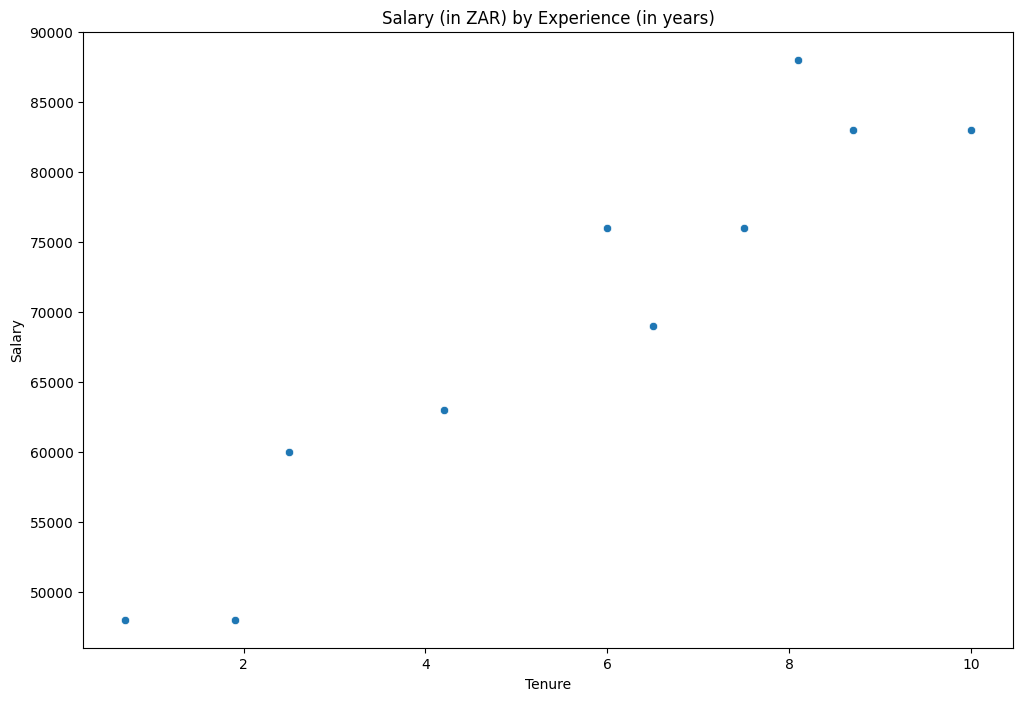

In [372]:
plt.figure(figsize=(12,8))
sns.scatterplot(x=tenures, y=salaries)
plt.title('Salary (in ZAR) by Experience (in years)')
plt.xlabel('Tenure')
plt.ylabel('Salary')
plt.show()

### Check the average salary per tenure

In [373]:
salaryByTenure = defaultdict(list)
for salary, tenure in salariesAndTenures:
    salaryByTenure[tenure].append(salary)
salaryByTenure    

defaultdict(list,
            {8.7: [83000],
             8.1: [88000],
             0.7: [48000],
             6: [76000],
             6.5: [69000],
             7.5: [76000],
             2.5: [60000],
             10: [83000],
             1.9: [48000],
             4.2: [63000]})

In [374]:
averageSalaryByTenure = {tenure: sum(salaries) / len(salaries) for tenure, salaries in salaryByTenure.items()}   
averageSalaryByTenure

{8.7: 83000.0,
 8.1: 88000.0,
 0.7: 48000.0,
 6: 76000.0,
 6.5: 69000.0,
 7.5: 76000.0,
 2.5: 60000.0,
 10: 83000.0,
 1.9: 48000.0,
 4.2: 63000.0}

### Function to group tenures for a more helpful result 

In [375]:
def bucket_tenures(tenure):
    if tenure < 2:
        return 'Less than two.'
    elif tenure < 5:
        return 'Between two and five'
    else:
        return 'Greater than five'   

### Group salary by tenure

In [376]:
salaryByTenureBucket = defaultdict(list)
for salary, tenure in salariesAndTenures:
    bucket = bucket_tenures(tenure)
    salaryByTenureBucket[bucket].append(salary)  
salaryByTenureBucket  

defaultdict(list,
            {'Greater than five': [83000, 88000, 76000, 69000, 76000, 83000],
             'Less than two.': [48000, 48000],
             'Between two and five': [60000, 63000]})

In [377]:
averageSalaryByTenureBucket ={tenureBucket: sum(salaries) / len(salaries) for tenureBucket, salaries in salaryByTenureBucket.items()}
averageSalaryByTenureBucket

{'Greater than five': 79166.66666666667,
 'Less than two.': 48000.0,
 'Between two and five': 61500.0}

In [378]:
paidOrNot = [(0.7, 'paid'), (1.9, 'unpaid'), (2.5, 'paid'), (4.2, 'unpaid'), (6.0, 'unpaid'), (6.5, 'unpaid'), (7.5, 'unpaid'), (8.1, 'unpaid'), (8.7, 'paid'), (10.0, 'paid')]
paidOrNot

[(0.7, 'paid'),
 (1.9, 'unpaid'),
 (2.5, 'paid'),
 (4.2, 'unpaid'),
 (6.0, 'unpaid'),
 (6.5, 'unpaid'),
 (7.5, 'unpaid'),
 (8.1, 'unpaid'),
 (8.7, 'paid'),
 (10.0, 'paid')]

### Function to predict whether a user paid or not

In [379]:
def predict_paid_or_not(yearsExperience):  
    if yearsExperience < 3:
        return 'Paid'
    elif yearsExperience < 8.5:
        return 'Unpaid'
    else:
        return 'Paid'
    

In [380]:
print(f'A user with five years experience: {predict_paid_or_not(5)}')

A user with five years experience: Unpaid


### Find the most interesting topics

In [381]:
wordAndCounts = Counter(word for user, interest in interests for word in interest.lower().split())
wordAndCounts

Counter({'big': 3,
         'data': 3,
         'java': 3,
         'python': 3,
         'learning': 3,
         'hadoop': 2,
         'hbase': 2,
         'cassandra': 2,
         'scikit-learn': 2,
         'r': 2,
         'statistics': 2,
         'regression': 2,
         'probability': 2,
         'machine': 2,
         'neural': 2,
         'networks': 2,
         'spark': 1,
         'storm': 1,
         'nosql': 1,
         'mongodb': 1,
         'postgres': 1,
         'scipy': 1,
         'numpy': 1,
         'statsmodels': 1,
         'pandas': 1,
         'decision': 1,
         'trees': 1,
         'libsvm': 1,
         'c++': 1,
         'haskell': 1,
         'programming': 1,
         'languages': 1,
         'mathematics': 1,
         'theory': 1,
         'mahout': 1,
         'deep': 1,
         'artificial': 1,
         'intelligence': 1,
         'mapreduce': 1})

### Since most topics only appear once they aren't really topics of interest 

In [388]:
for word,count in wordAndCounts.most_common():
    if count > 1:
        print(f'The interest: "{word.upper()}" appears {count} times')

The interest: "BIG" appears 3 times
The interest: "DATA" appears 3 times
The interest: "JAVA" appears 3 times
The interest: "PYTHON" appears 3 times
The interest: "LEARNING" appears 3 times
The interest: "HADOOP" appears 2 times
The interest: "HBASE" appears 2 times
The interest: "CASSANDRA" appears 2 times
The interest: "SCIKIT-LEARN" appears 2 times
The interest: "R" appears 2 times
The interest: "STATISTICS" appears 2 times
The interest: "REGRESSION" appears 2 times
The interest: "PROBABILITY" appears 2 times
The interest: "MACHINE" appears 2 times
The interest: "NEURAL" appears 2 times
The interest: "NETWORKS" appears 2 times
